In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
print("Shape:", df.shape)

Shape: (1000, 8)


In [ ]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
duplicated = df.duplicated()
duplicated.sum()

np.int64(0)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.gender.value_counts()

,count
gender,
female,518
male,482


In [ ]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


<Axes: xlabel='race/ethnicity', ylabel='Count'>

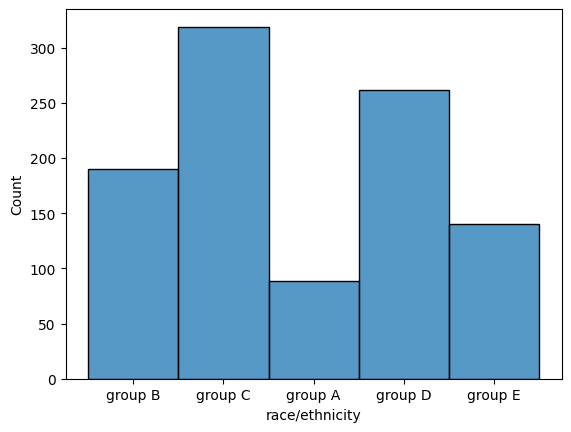

In [ ]:
sns.histplot(df['race/ethnicity'])

In [ ]:
df['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


In [ ]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


<Axes: xlabel='parental level of education', ylabel='Count'>

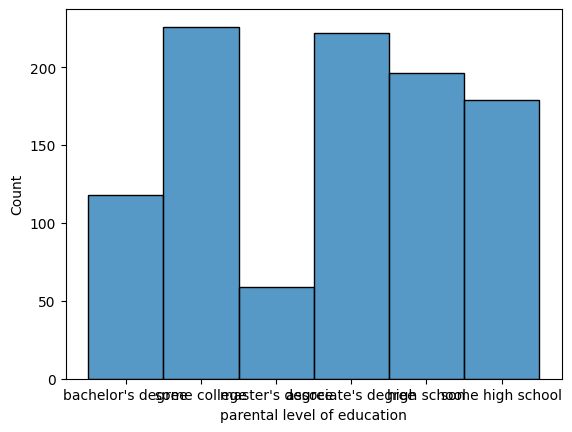

In [ ]:
sns.histplot(df['parental level of education'])

Normalization

Fix errors

In [ ]:

df.columns = [c.strip().lower().replace(" ", "_").replace("/", "_") for c in df.columns]

df['lunch'] = df['lunch'].replace({'standard ': 'standard'})


Missing value

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Encoding

In [ ]:
# One-Hot Encoding
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education',
            'lunch', 'test_preparation_course']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()


,math_score,reading_score,writing_score,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


Outliers

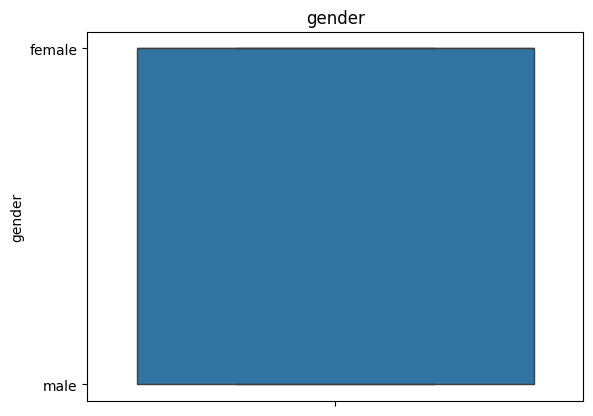

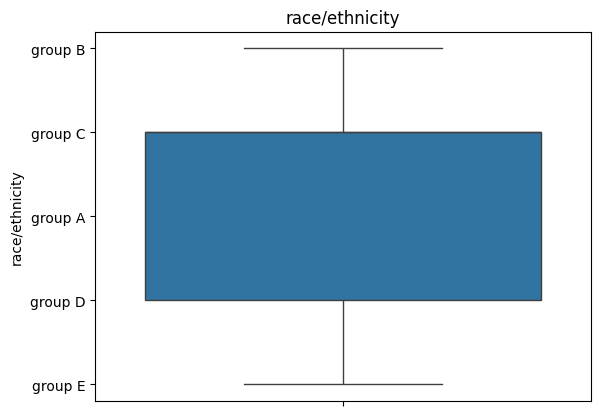

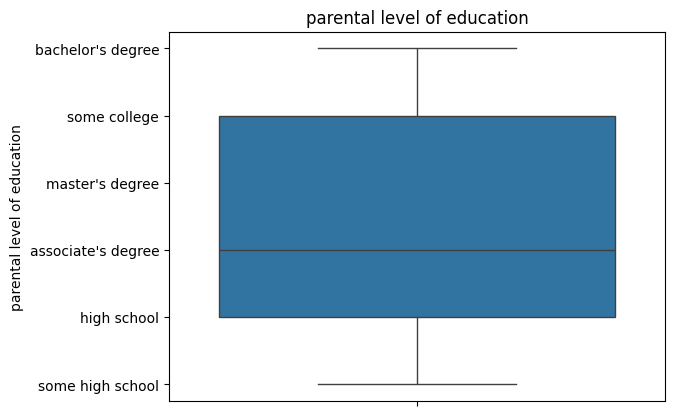

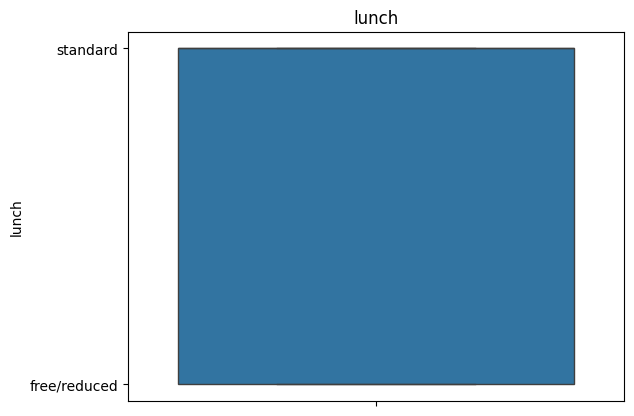

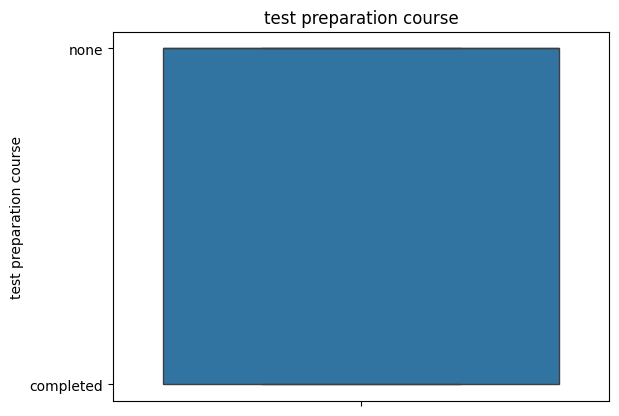

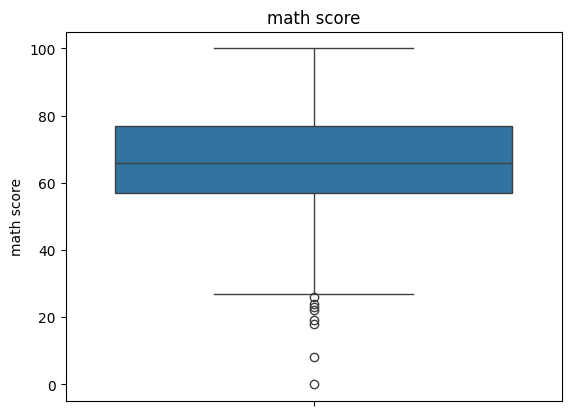

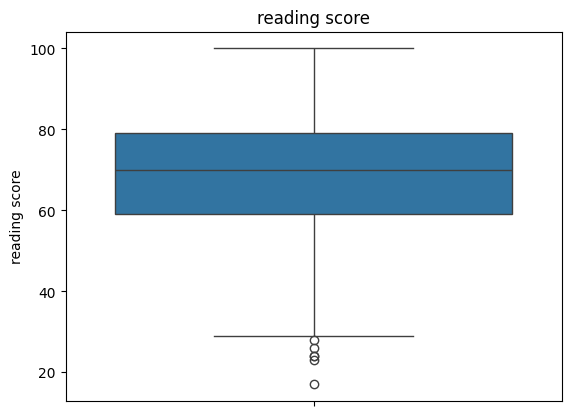

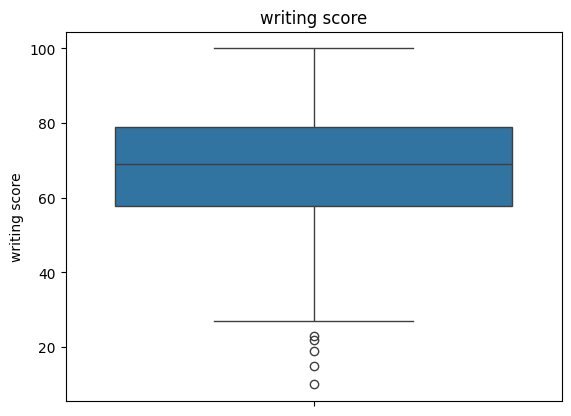

In [ ]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()


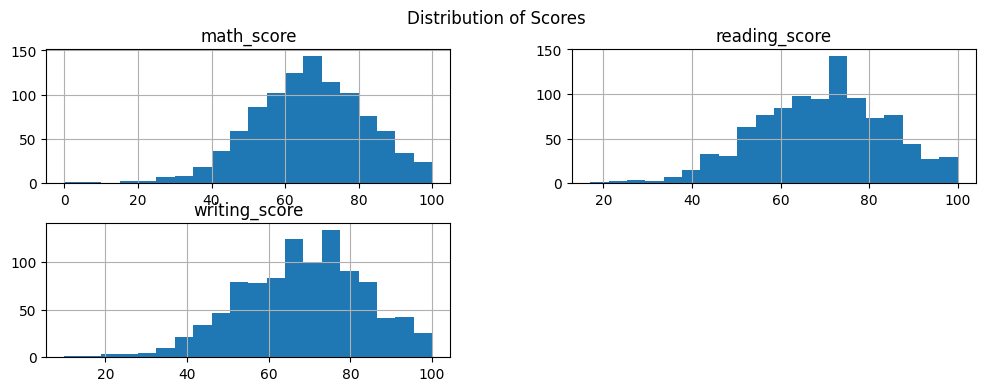

In [ ]:
num_cols = ["math_score", "reading_score", "writing_score"]

df[num_cols].hist(bins=20, figsize=(12,4))
plt.suptitle("Distribution of Scores")
plt.show()


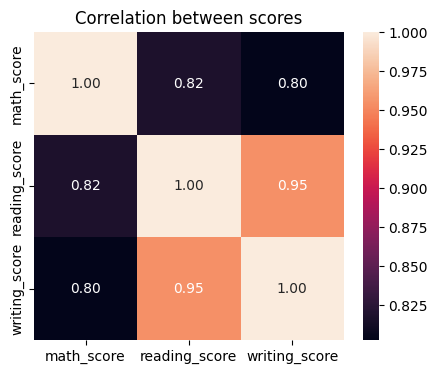

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.title('Correlation between scores')
plt.show()



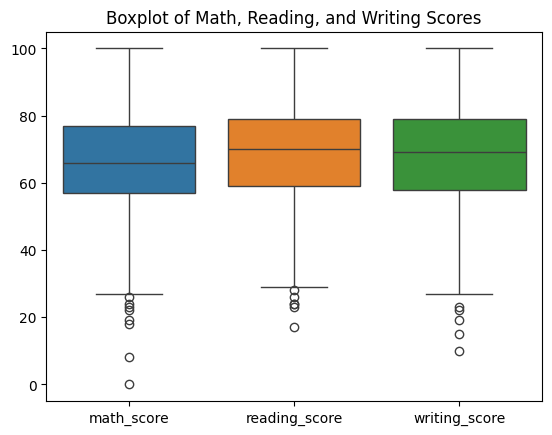

In [ ]:
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Math, Reading, and Writing Scores")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df['average_score'] = df[['math_score','reading_score','writing_score']].mean(axis=1)
df['passed'] = (df['average_score'] >= 50).astype(int)

X = pd.get_dummies(df.drop(['passed'], axis=1), drop_first=True)
y = df['passed']

scaler = StandardScaler()
X[['math_score','reading_score','writing_score','average_score']] = scaler.fit_transform(
    X[['math_score','reading_score','writing_score','average_score']]
)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


## Modeling

logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test,y_pred1))



              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_lr.best_score_)

Best Logistic Regression Params: {'C': 10, 'solver': 'lbfgs'}
Best Logistic Regression Accuracy: 0.9912500000000002


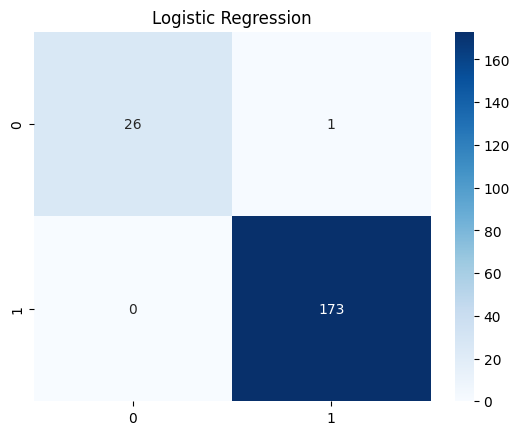

In [ ]:

cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Logistic Regression")
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC

model2 = SVC(kernel='rbf')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test,y_pred2))



              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Accuracy:", grid_svm.best_score_)

Best SVM Params: {'C': 10, 'kernel': 'linear'}
Best SVM Accuracy: 0.9925


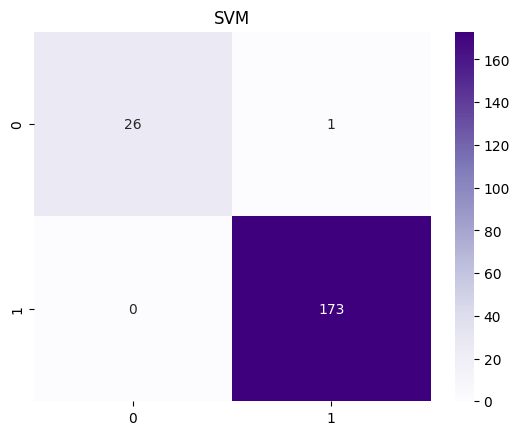

In [ ]:

cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples')
plt.title("SVM")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       1.00      0.74      0.85        27
           1       0.96      1.00      0.98       173

    accuracy                           0.96       200
   macro avg       0.98      0.87      0.92       200
weighted avg       0.97      0.96      0.96       200



In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN Accuracy:", grid_knn.best_score_)

Best KNN Params: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN Accuracy: 0.97875


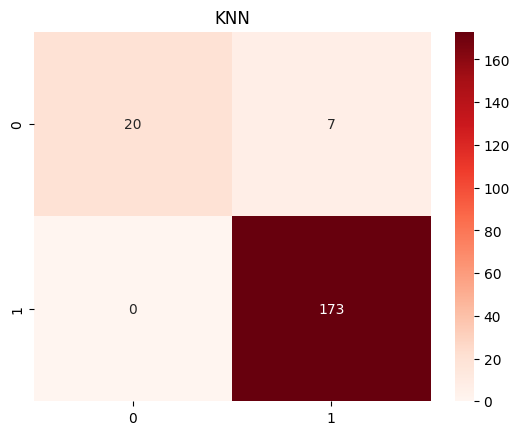

In [ ]:

cm = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.title("KNN")
plt.show()


ACC

In [ ]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test,y_pred1),
    "SVM": accuracy_score(y_test,y_pred2),
    "KNN": accuracy_score(y_test,y_pred3),
}


acc_df = pd.DataFrame(list(accuracies.items()), columns=["Model","Accuracy"])
print(acc_df)


                 Model  Accuracy
0  Logistic Regression     0.995
1                  SVM     0.995
2                  KNN     0.965


Bar chart

/tmp/ipython-input-4252708741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_df, x="Model",


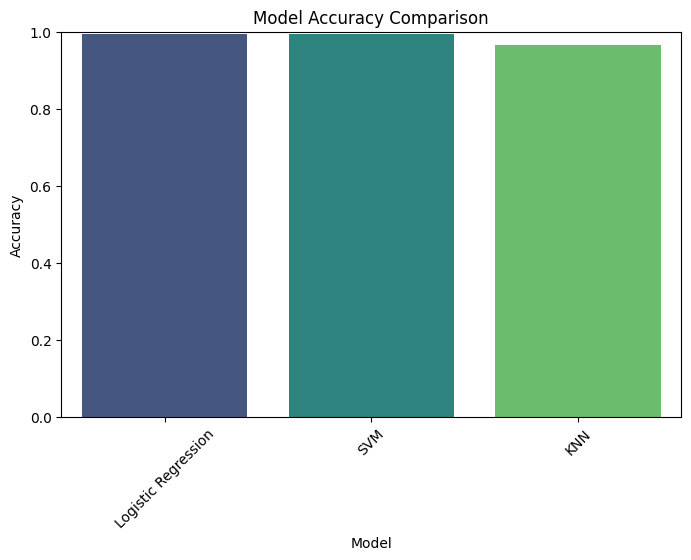

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.barplot(data=acc_df, x="Model",
            y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()


AdaBoots

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


ada = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc = accuracy_score(y_test, y_pred_ada) * 100

print(f"Accuracy: {acc:.2f}%")
print(classification_report(y_test, y_pred_ada))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {acc:.2f}%")




=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 100.00%


Train&Test

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
    test_acc = accuracy_score(y_test, model.predict(X_test)) * 100
    results.append([name, train_acc, test_acc])

acc_df = pd.DataFrame(results, columns=["Model", "Training Accuracy (%)", "Testing Accuracy (%)"])
print(acc_df)


                 Model  Training Accuracy (%)  Testing Accuracy (%)
0  Logistic Regression                 99.625                  99.5
1                  SVM                 99.375                  99.5
2                  KNN                 98.625                  96.5
3             AdaBoost                100.000                 100.0
4        Random Forest                100.000                 100.0


ACC

/tmp/ipython-input-3824232151.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_results, x="Model", y="Testing Accuracy (%)", palette="viridis")


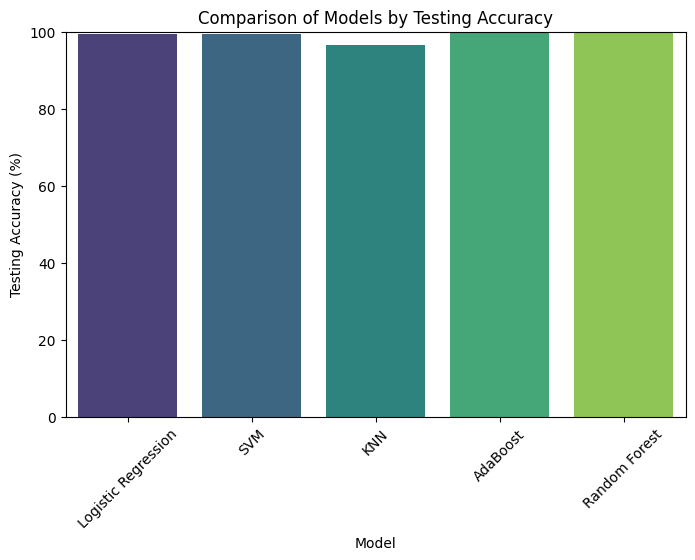

the best model: AdaBoost accuracy: 100.0 %


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

best_results = acc_df[["Model", "Testing Accuracy (%)"]]

plt.figure(figsize=(8,5))
sns.barplot(data=best_results, x="Model", y="Testing Accuracy (%)", palette="viridis")
plt.title("Comparison of Models by Testing Accuracy")
plt.ylabel("Testing Accuracy (%)")
plt.ylim(0,100)
plt.xticks(rotation=45)
plt.show()

best_model = best_results.loc[best_results["Testing Accuracy (%)"].idxmax()]
print("the best model:", best_model["Model"], "accuracy:", best_model["Testing Accuracy (%)"], "%")
